# **Importing Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../Datasets/s05e05/train.csv', index_col=0)

In [6]:
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


**Count Number of Missing Values**

In [8]:
for column in df.columns:
    print(f"{column}: {df[column].isnull().sum()} null values")

Sex: 0 null values
Age: 0 null values
Height: 0 null values
Weight: 0 null values
Duration: 0 null values
Heart_Rate: 0 null values
Body_Temp: 0 null values
Calories: 0 null values


## **Properties of `Sex` column and it's relation with other features**

**Distribution of Sex entries:**

In [38]:
for sex in df.Sex.unique():
    sex_percentage = (df[df['Sex'] == sex].shape[0] / df.shape[0]) * 100
    print(f'{sex} entries: {sex_percentage:.2f}%')

male entries: 49.90%
female entries: 50.10%


*Comment* : Equal distribution in terms of `Sex`

**Distribution and Properties of Age with respect to Sex**

In [40]:
df.groupby('Sex').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,375721.0,41.273650,15.386384,20.0,28.0,40.0,52.0,79.0
male,374279.0,41.567724,14.958469,20.0,29.0,40.0,52.0,79.0


*Comment* : Properties of Age with respect to male and female are similar.

In [41]:
df.groupby('Sex').Height.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,375721.0,165.022200,8.198525,126.0,159.0,164.0,171.0,222.0
male,374279.0,184.410448,8.589572,141.0,179.0,184.0,191.0,222.0


<Figure size 800x600 with 0 Axes>

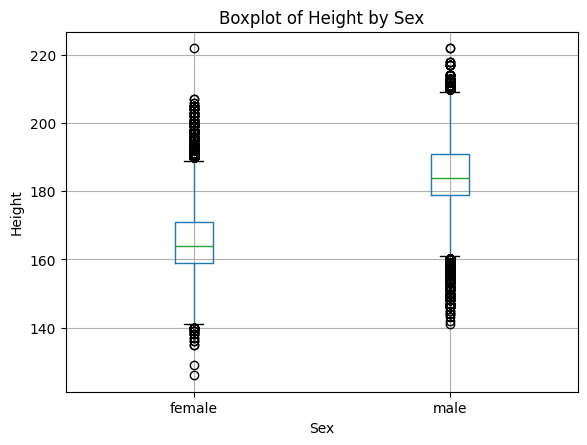

In [42]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Height', by='Sex')
plt.title('Boxplot of Height by Sex')
plt.suptitle('')
plt.xlabel('Sex')
plt.ylabel('Height')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

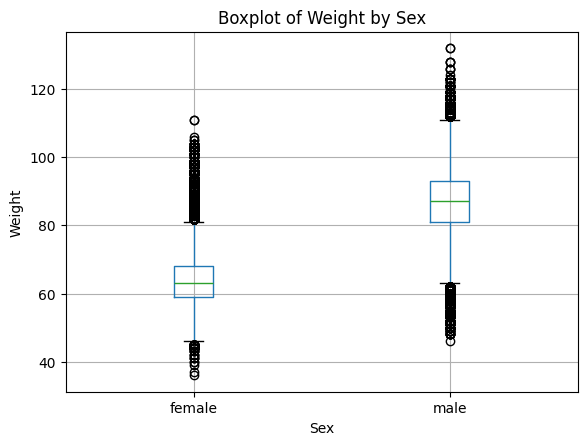

In [46]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Weight', by='Sex')
plt.title('Boxplot of Weight by Sex')
plt.suptitle('')
plt.xlabel('Sex')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

In [45]:
df.groupby('Sex').Calories.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,375721.0,87.534761,57.905734,1.0,37.0,80.0,133.0,300.0
male,374279.0,89.033683,66.590171,1.0,31.0,73.0,138.0,314.0


<Figure size 800x600 with 0 Axes>

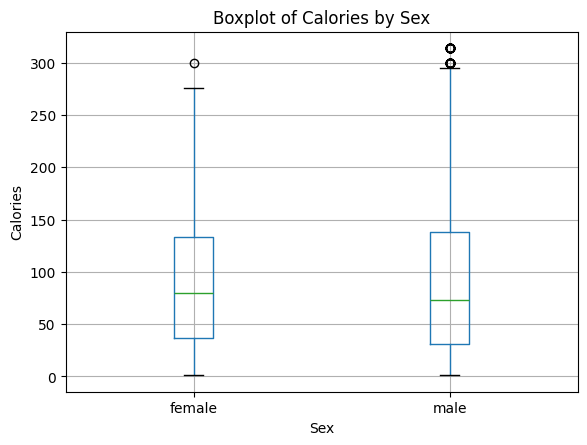

In [47]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Calories', by='Sex')
plt.title('Boxplot of Calories by Sex')
plt.suptitle('')
plt.xlabel('Sex')
plt.ylabel('Calories')
plt.grid(True)
plt.show()

**NOTES:**
- Samples of age with respect to sex are equal.
- height and weight of males are greater than that of females in general. (*this may also signify that weight and height are correlated with respect to Sex.*)
- 50% of males burned less calories than 50% of females but, males burned more calories in average than females. (This suggests a **right-skewed distribution** for males — many males burned lower calories, but a subset burned significantly higher calories, pulling up the mean.)